linear score:  0.8
rbf score:  0.6
poly score:  0.5


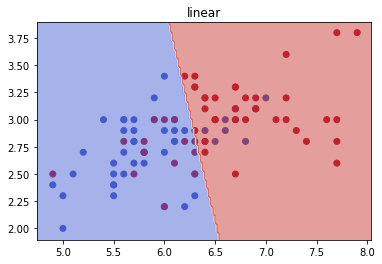

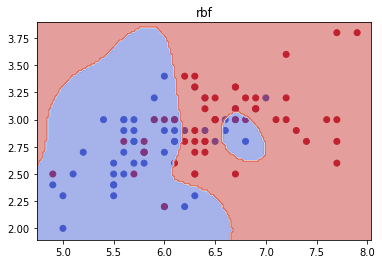

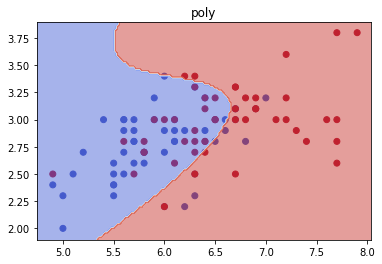

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# supplementory functions
def make_meshgrid(ax, h=.02):
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def draw_boundary(ax, clf):
    xx, yy = make_meshgrid(ax)
    return plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.5)

iris = load_iris()

iris_X = iris.data[iris.target != 0, :2]
iris_y = iris.target[iris.target != 0]

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.1)

for kernel in ('linear', 'rbf', 'poly'):
    fig, ax = plt.subplots()
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    
    plt.scatter(x=iris_X[:, 0], y=iris_X[:, 1], c=iris_y, cmap=plt.cm.coolwarm)
    draw_boundary(ax, clf)
    plt.title(kernel)
    
    score = clf.score(X_test, y_test)
    print(kernel, "score: ", score)

plt.show()